# Capstone Project
This project will be to make a platform that will use machine learning to classify hand shapes that are used in ASL. 

Here are a few of the prerequisites required on your machine or virtual environment to get the projecy working:

* Python 3.8+
* Use PIP to install the following packages:
    * sklearn
    * PIL
    * numpy
    * imutils

## Data and Structures

The dataset used was downloaded from [Kaggle](https://www.kaggle.com/grassknoted/asl-alphabet).

Once the images are saved and extracted, we put it in the following structure:

```
+-- Dataset
|   +-- A
|   +-- B
|   +-- C
|   +-- D
|   +-- E
|   +-- F
|   +-- G
|   +-- H
|   +-- I
|   +-- J
|   +-- K
|   +-- L
|   +-- M
|   +-- N
|   +-- O
|   +-- P
|   +-- Q
|   +-- R
|   +-- S
|   +-- T
|   +-- U
|   +-- V
|   +-- W
|   +-- X
|   +-- Y
|   +-- Z
+-- Test
|   +-- A_test.jpg
|   +-- B_test.jpg
|   +-- C_test.jpg
|   +-- D_test.jpg
|   +-- E_test.jpg
|   +-- F_test.jpg
|   +-- G_test.jpg
|   +-- H_test.jpg
|   +-- I_test.jpg
|   +-- J_test.jpg
|   +-- K_test.jpg
|   +-- L_test.jpg
|   +-- M_test.jpg
|   +-- N_test.jpg
|   +-- O_test.jpg
|   +-- P_test.jpg
|   +-- Q_test.jpg
|   +-- R_test.jpg
|   +-- S_test.jpg
|   +-- T_test.jpg
|   +-- U_test.jpg
|   +-- V_test.jpg
|   +-- W_test.jpg
|   +-- X_test.jpg
|   +-- Y_test.jpg
|   +-- Z_test.jpg
+-- ML.ipynb
```

## Importing the packages. 

The first thing we need to do, after installing, is to import the packages

In [1]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import pickle
from IPython import display

## Notes

Because we are working with images, we need to split the image into its respective RGB color channels, and then create a feature vector with 6 values: *The mean and standard deviation for each of the 3 channels*.

In [10]:
# Function for changing the colorgrade
def extract_color_statistics(image):
    (R, G, B) = image.split()
    features = [np.mean(R), np.mean(G), np.mean(B), np.std(R), np.std(G), np.std(B)]

    return features

## Variables and data/labels

The cell below is where we will initialize our variables.

*dataset* - This is the path to our image folder
*imagePath* - Use the **imutils** import to set the path for our code
*data* - The data list will hold all our image *feature vectors*.
*labels* - The labels list will hold the corresponding labels

In [11]:
# Set and initialize variables for later use
dataset = "Dataset"
imagePaths = paths.list_images(dataset)
data = []
labels = []

## Our database

Now that we have our path set, it is time to run the images through our previous **extract_color_statistics** function.

The for loop will behave as such:

* Load the input image
* Compute and extract the channel stats
* Add the data to the **data** list
* Extract the label class from the path name
* Update the labels list

In [12]:
# loop over our input images
for imagePath in imagePaths:
    # Load the input image from disk
    image = Image.open(imagePath)
    # Extract the features
    features = extract_color_stats(image)
    data.append(features)
    # extract the class label from the file path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

## Our labels

Now that the loop is completed, we need to encode our labels, converting them from strings to integers.

In [13]:
le = LabelEncoder()
labels = le.fit_transform(labels)

## Splitting our database

In machine learning, it is considered best practice to split a dataset between training, and testing. There is another phase, sometimes called **validation**, where the model is tested "by hand", but this will not be done at this stage. For our data, we are splitting our data into 75% for training and 25% for testing.


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)

## Training our model

Now, we are going to train our models using two different methods, ultimately choosing the one that provides the most accurate results on our database.

### KNN

The first ML model we are using is known as *k-Nearest Neighbor*(k-NN). This model is the most simple image classification algorithm. The algorithm relies on the distance between feature vectors, finding the most common class among the **k** closest examples.

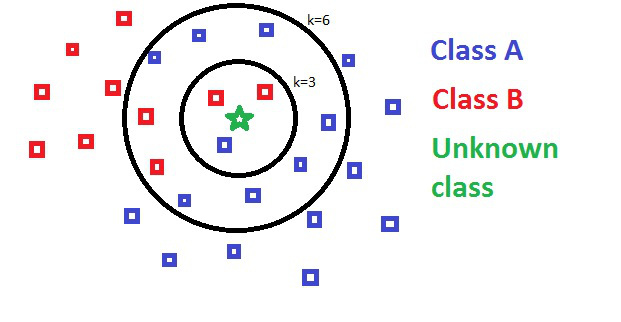

In [2]:
display.Image("KNN.jpeg")